In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import json
#import plotly.express as px
#import plotly.graph_objs as go

dados = pd.read_csv('dados-sp-1.csv', sep=";", encoding='latin1',
    parse_dates=['dataNotificacao', 'dataInicioSintomas', 'dataNascimento', 'dataTeste', 'dataEncerramento'])


In [48]:
# Limpando os dados
dados[dados['idade'] > 116] = float("NaN")

In [49]:
# Checando os dados
dados.info()
print(dados.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   ÿid                       999750 non-null  object             
 1   dataNotificacao           999563 non-null  datetime64[ns, UTC]
 2   dataInicioSintomas        919400 non-null  datetime64[ns, UTC]
 3   dataNascimento            999750 non-null  object             
 4   sintomas                  997034 non-null  object             
 5   profissionalSaude         921412 non-null  object             
 6   cbo                       133207 non-null  object             
 7   condicoes                 138039 non-null  object             
 8   estadoTeste               886626 non-null  object             
 9   dataTeste                 803493 non-null  datetime64[ns, UTC]
 10  tipoTeste                 709240 non-null  object             
 11 

In [53]:
print(dados['dataNotificacao'].describe(datetime_is_numeric=True))
print(dados['evolucaoCaso'].value_counts())

count                                 999563
mean     2020-06-18 14:58:04.420368640+00:00
min                2020-01-04 03:00:00+00:00
25%                2020-05-26 03:00:00+00:00
50%         2020-06-28 01:45:38.360000+00:00
75%                2020-07-14 03:00:00+00:00
max         2020-08-20 03:00:46.854000+00:00
Name: dataNotificacao, dtype: object
Cura                        322022
Cancelado                    66118
Ignorado                     45070
Em tratamento domiciliar     25680
Óbito                          852
Internado                      712
Internado em UTI               118
Name: evolucaoCaso, dtype: int64


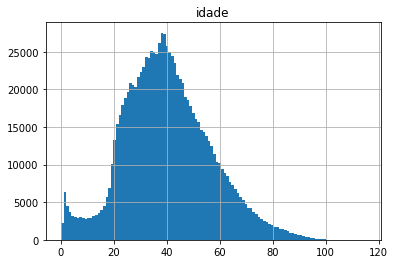

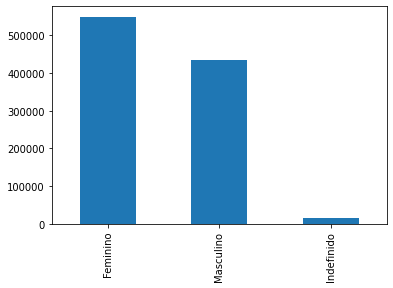

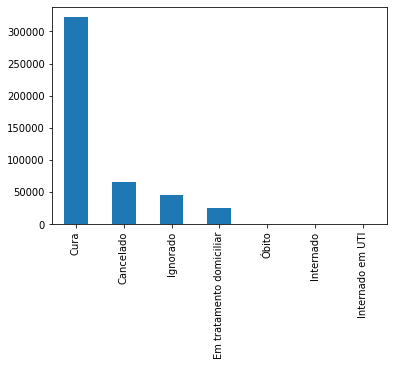

In [51]:
dados.hist(column='idade', bins=116)
plt.show()

dados['sexo'].value_counts().plot(kind='bar')
plt.show()

dados['evolucaoCaso'].value_counts().plot(kind='bar')
plt.show()



In [94]:
cidades = {}
for i in range(len(dados)):
    cidadeIBGE = dados['municipioIBGE'][i]
    resultadoTeste = dados['resultadoTeste'][i]
    if cidadeIBGE not in cidades:
        cidades[cidadeIBGE] = {}
        cidades[cidadeIBGE]['Nome'] = dados['municipio'][i]
        cidades[cidadeIBGE]['Positivo'] = 0
        cidades[cidadeIBGE]['Negativo'] = 0

    # Precisa disso por causa dos NaN
    if resultadoTeste not in cidades[cidadeIBGE]:
        cidades[cidadeIBGE][resultadoTeste] = 0
    cidades[cidadeIBGE][resultadoTeste] += 1

print("Numero de cidades = ", len(cidades.keys()))


Numero de cidades =  1155


In [95]:
sort_cidades = sorted(cidades.items(), key=lambda x: x[1]['Positivo'], reverse=True)

for i in sort_cidades:
	print(i[1])

3550308.0 {'Nome': 'São Paulo', 'Positivo': 69800, 'Negativo': 111812, nan: 148078}
3548500.0 {'Nome': 'Santos', 'Positivo': 8302, 'Negativo': 4199, nan: 2633}
3548708.0 {'Nome': 'São Bernardo do Campo', 'Positivo': 7828, 'Negativo': 29121, nan: 10289}
3509502.0 {'Nome': 'Campinas', 'Positivo': 7742, 'Negativo': 10922, nan: 11257}
3552205.0 {'Nome': 'Sorocaba', 'Positivo': 6935, 'Negativo': 12838, nan: 1332}
3543402.0 {'Nome': 'Ribeirão Preto', 'Positivo': 6882, 'Negativo': 13279, nan: 970}
3549805.0 {'Nome': 'São José do Rio Preto', 'Positivo': 5237, 'Negativo': 20184, nan: 5446}
3518800.0 {'Nome': 'Guarulhos', 'Positivo': 4753, 'Negativo': 6843, nan: 2636}
3547809.0 {'Nome': 'Santo André', 'Positivo': 3653, 'Negativo': 9034, nan: 1259}
3513801.0 {'Nome': 'Diadema', 'Positivo': 3101, 'Negativo': 4674, nan: 4243}
3538709.0 {'Nome': 'Piracicaba', 'Positivo': 2814, 'Negativo': 7645, nan: 3464}
3502804.0 {'Nome': 'Araçatuba', 'Positivo': 2811, 'Negativo': 4342, nan: 3728}
3541000.0 {'Nome